<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo_43_Carlos_Mendoza_and_Alan_Avelino/blob/main/RETO_PARTE2_EQUIPO43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia y Analítica de datos**
## **RETO FINAL PARTE 1**
### **Limpieza, Análisis, Visualización y K-means**


---

## **Profesora:** María de la Paz Rico Fernández

## **Equipo 43:** 
* Carlos Daniel Mendoza Paz - A01793027
* Alan Avelino Fernández Juárez - A00989308



---
Noviembre 16, 2022



# Librerias

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 16.7 MB 609 kB/s 
     |████████████████████████████████| 6.3 MB 39.4 MB/s 


In [2]:
pip install qeds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 179 kB 6.8 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=26f88ac76d50b2707bfdb338fd6a586f414f7d7f396657c4bef43649bd7fb490
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
Successfully built qeds


Importamos ls librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();



---


# **Limpieza de datos**


---



Cargamos el dataset

In [4]:
#Base de datos 1
#Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020
path = "https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-Equipo_43_Carlos_Mendoza_and_Alan_Avelino/main/Data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
df = pd.read_csv(path, sep=',', encoding='cp1252')

Elegimos la base de datos de aguas subterraneas 

In [5]:
#Hacemos una exploración de los datos
#Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020
#Hacemos un "info" para ver la distribución de nuestros datos
#También podemos ver cuantos nulos tenemos en cada uno de los features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Vemos que tenemos nuestros datos distribuidos en:
* 5 variables float
* 1 variable int
* 51 variables Object

In [6]:
#Hacemos un shape
df.shape

(1068, 57)

In [7]:
#Hacemos una exploración de los datos
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Basado en la exploracion de los datos se observa que muchas columnas contienen datos numericos pero estan como objeto. Algunas de ellas es porque tienen una cadena en vez de un número, algo como esto "<0.02" para ello vamos a convertirlos a int o a float. Los datos que no tengan algún número valido, serán automaticamente marcados como "nan".

In [8]:
#Basados en la exploración de los datos identificamos las columnas a convertir
#Creamos una lista con el nombre de las columnas que vamos a convertir a float
colum_convert=["SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L",
              "CR_TOT_mg/L","HG_TOT_mg/L","PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L"]
          

In [9]:
#Cambiamos el tipo de dato de nuestras columnas ya que algunas de ellas deben de ser float en vez de objeto
for i in colum_convert:
  df[i] = pd.to_numeric((df[i]), errors='coerce')
  #print(df[i].dtype)

In [10]:
#Hacemos un info para ver los cambios en los tipos de datos de cada una de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Despues de convertirlas vemos que tenemos nuestros datos distribuidos en:
* 17 variables float
* 1 variable int
* 39 variables Object

In [11]:
#Vamos a marcar todos los datos nulos, ya que a veces estan vacios o vienen como "0", "N/A", "SIN DATOS" o "NaN" que es lo que
#nos regresó la función "to_numeric" cuando esta se encontró con un dato no numérico
#Para eso las vamos a remplazar con un nan de numpy
df = df.replace(["NO DATA","N/A","0","NaN"],np.nan)

In [12]:
#df["SDT_mg/L"]
#print (df.index[df["SDT_mg/L"]])
#print (df.loc[df['SDT_mg/L']== 12])
#df.iloc[: , 1].values
#df.iloc[: , 14].values
#df.shape[1]

In [13]:
#Calculamos el porcentaje de nulos por cada una de las columnas
print("--- PORCENTAJE DE DATOS NULOS POR COLUMNA ---")
for i in df.columns:
  percent_missing = df[i].isnull().sum() * 100 / len(df)
  percent_missing = round(percent_missing,2)
  print(i, percent_missing,"%")


--- PORCENTAJE DE DATOS NULOS POR COLUMNA ---
CLAVE 0.0 %
SITIO 0.0 %
ORGANISMO_DE_CUENCA 0.0 %
ESTADO 0.0 %
MUNICIPIO 0.0 %
ACUIFERO 0.0 %
SUBTIPO 0.0 %
LONGITUD 0.0 %
LATITUD 0.0 %
PERIODO 0.0 %
ALC_mg/L 0.37 %
CALIDAD_ALC 0.37 %
CONDUCT_mS/cm 0.56 %
CALIDAD_CONDUC 0.56 %
SDT_mg/L 100.0 %
SDT_M_mg/L 0.28 %
CALIDAD_SDT_ra 0.19 %
CALIDAD_SDT_salin 0.19 %
FLUORUROS_mg/L 15.17 %
CALIDAD_FLUO 0.0 %
DUR_mg/L 2.53 %
CALIDAD_DUR 0.09 %
COLI_FEC_NMP/100_mL 69.01 %
CALIDAD_COLI_FEC 0.0 %
N_NO3_mg/L 6.18 %
CALIDAD_N_NO3 0.09 %
AS_TOT_mg/L 76.31 %
CALIDAD_AS 0.0 %
CD_TOT_mg/L 99.81 %
CALIDAD_CD 0.0 %
CR_TOT_mg/L 79.96 %
CALIDAD_CR 0.0 %
HG_TOT_mg/L 90.64 %
CALIDAD_HG 0.0 %
PB_TOT_mg/L 97.19 %
CALIDAD_PB 0.0 %
MN_TOT_mg/L 51.03 %
CALIDAD_MN 0.0 %
FE_TOT_mg/L 37.55 %
CALIDAD_FE 0.0 %
SEMAFORO 0.0 %
CONTAMINANTES 40.64 %
CUMPLE_CON_ALC 0.0 %
CUMPLE_CON_COND 0.0 %
CUMPLE_CON_SDT_ra 0.0 %
CUMPLE_CON_SDT_salin 0.0 %
CUMPLE_CON_FLUO 0.0 %
CUMPLE_CON_DUR 0.0 %
CUMPLE_CON_CF 0.0 %
CUMPLE_CON_NO3 0.0 %
CU

In [14]:
#Vemos que columnas tienen datos nulos mayor al 40% o 50% para proceder a eliminarlas
print("--- PORCENTAJE DE DATOS NULOS POR COLUMNA ---")
for i in df.columns:
  percent_missing = df[i].isnull().sum() * 100 / len(df)
  percent_missing = round(percent_missing,2)
  if percent_missing >40:
    print(i, percent_missing,"%")

--- PORCENTAJE DE DATOS NULOS POR COLUMNA ---
SDT_mg/L 100.0 %
COLI_FEC_NMP/100_mL 69.01 %
AS_TOT_mg/L 76.31 %
CD_TOT_mg/L 99.81 %
CR_TOT_mg/L 79.96 %
HG_TOT_mg/L 90.64 %
PB_TOT_mg/L 97.19 %
MN_TOT_mg/L 51.03 %
CONTAMINANTES 40.64 %


Como podemos ver hay muchas variables que tienen mas del 50% de sus datos como "nan" vamos a regresar al head que hicimos anteriormente y analizar porque tienen ese número tan alto de nulls

Basado en el análisis la columna "SDT_mg/L" está completamente vacia, por lo que procedemos a eliminarla.

In [15]:
#Hacemos un head para ver lo que trae esta columna antes de eliminarlas
df['SDT_mg/L'].sort_values(ascending=False)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1063   NaN
1064   NaN
1065   NaN
1066   NaN
1067   NaN
Name: SDT_mg/L, Length: 1068, dtype: float64

In [16]:
#Eliminamos las columnas
df.drop(['SDT_mg/L'], axis=1, inplace=True)

Ahora analizámos las columnas con datos nulos mayor al 40% nuevamente, para ver si se eliminan o se rellenan.

In [17]:
#Creamos una función que nos ayude a formatear las variables numericas que aún tienen nulos con el minimo
def format_col_num(col):
  #Vemos el tipo de variable
  print("Type:",df[col].dtype)
  #Contamos los nulos que tiene
  print("Nulos:",df[col].isnull().sum())

  #Dado que es una vaiable categórica, vamos a rellenar con la moda
  min = df[col].min()
  print("El minimo es: ",min)

  #Procedemos a rellenar los nulos con la moda
  df[col].fillna(min, inplace=True)

  #Verificamos que ya no tenemos datos nulos en esa columna
  print("La columna tiene nulos:" , df[col].isnull().any())

In [18]:
#Creamos una función que nos ayude a formatear las variables numericas que aún tienen nulos con el promedio
def format_col_num_mean(col):
  #Vemos el tipo de variable
  print("Type:",df[col].dtype)

  #Contamos los nulos que tiene
  print("Nulos:",df[col].isnull().sum())

  #Dado que es una vaiable categórica, vamos a rellenar con la moda
  mean = df[col].mean()
  print("El promedio es: ",mean)

  #Procedemos a rellenar los nulos con la moda
  df[col].fillna(mean, inplace=True)

  #Verificamos que ya no tenemos datos nulos en esa columna
  print("La columna tiene nulos:" , df[col].isnull().any())

In [19]:
#Creamos una función que nos ayude a formatear las variables numericas que aún tienen nulos
def format_col_cat(col):
  #Vemos el tipo de variable
  print("Type:",df[col].dtype)
  #Contamos los nulos que tiene
  print("Nulos:",df[col].isnull().sum())

  #Dado que es una vaiable categórica, vamos a rellenar con la moda
  moda = df[col].mode()
  print("La Moda es: ",moda[0])

  #Procedemos a rellenar los nulos con la moda
  df[col].fillna(moda[0], inplace=True)

  #Verificamos que ya no tenemos datos nulos en esa columna
  print("La columna tiene nulos:" , df[col].isnull().any())

In [20]:
#Analizámos la columna "COLI_FEC_NMP/100_mL"
#Verificamos los datos que tenía antes de ser convertida en float (usamos el head anterior a la conversión)
#Nos dimos cuenta que tenia muchos valores "<1.1" que ahora son "nan" despues de convertirlos
#Para este caso vamos a rellenar esos nulls con "1.1" tomando como el valor minimo
#En este caso el minimo es 3.0, sin embargo si vemos el primer head antes de la conversión el minimo es 1.1
df["COLI_FEC_NMP/100_mL"].min()

#Procedemos a rellenar los nulos con el minimo
format_col_num(col="COLI_FEC_NMP/100_mL")


Type: float64
Nulos: 737
El minimo es:  3.0
La columna tiene nulos: False


In [21]:
#Analizámos la columna "AS_TOT_mg/L"
#Verificamos los datos que tenía antes de ser convertida en float (usamos el head anterior a la conversión)
#Nos dimos cuenta que tenia muchos valores "<0.01" que ahora son "nan" despues de convertirlos
#--- Para este caso vamos a rellenar esos nulls con "0.01" tomando como el valor minimo ---
df["AS_TOT_mg/L"].min()

#Contamos los nulos que tiene
print("Nulos:",df["AS_TOT_mg/L"].isnull().sum())

#Procedemos a rellenar los nulos con "0.01"
df["AS_TOT_mg/L"].fillna(0.01, inplace=True)

#Verificamos que ya no tenemos datos nulos en esa columna
print("La columna tiene nulos:" , df["AS_TOT_mg/L"].isnull().any())


Nulos: 815
La columna tiene nulos: False


In [22]:
#Analizámos la columna "CD_TOT_mg/L"
#Verificamos los datos que tenía antes de ser convertida en float (usamos el head anterior a la conversión)
#Nos dimos cuenta que tenia muchos valores "<0.003" que ahora son "nan" despues de convertirlos
#Para este caso vamos a rellenar esos nulls con "0.003" tomando como el valor minimo
#En este caso el minimo es 0.0056, sin embargo si vemos el primer head antes de la conversión el minimo es 0.003
df["CD_TOT_mg/L"].min()

print("Minimo:",0.003)
#Contamos los nulos que tiene
print("Nulos:",df["CD_TOT_mg/L"].isnull().sum())

#Procedemos a rellenar los nulos con "0.01"
df["CD_TOT_mg/L"].fillna(0.003, inplace=True)

#Verificamos que ya no tenemos datos nulos en esa columna
print("La columna tiene nulos:" , df["CD_TOT_mg/L"].isnull().any())

Minimo: 0.003
Nulos: 1066
La columna tiene nulos: False


In [23]:
#Analizámos la columna "CR_TOT_mg/L"
#Verificamos los datos que tenía antes de ser convertida en float (usamos el head anterior a la conversión)
#Nos dimos cuenta que tenia muchos valores "<0.005" que ahora son "nan" despues de convertirlos
#Para este caso vamos a rellenar esos nulls con "0.005" tomando como el valor minimo
format_col_num(col="CR_TOT_mg/L")

Type: float64
Nulos: 854
El minimo es:  0.005
La columna tiene nulos: False


In [24]:
#Analizámos la columna "HG_TOT_mg/L"
#Verificamos los datos que tenía antes de ser convertida en float (usamos el head anterior a la conversión)
#Nos dimos cuenta que tenia muchos valores "<0.0005" que ahora son "nan" despues de convertirlos
#Para este caso vamos a rellenar esos nulls con "0.0005" tomando como el valor minimo
df["HG_TOT_mg/L"].min()

format_col_num(col="HG_TOT_mg/L")

Type: float64
Nulos: 968
El minimo es:  0.0005
La columna tiene nulos: False


In [25]:
#Analizámos la columna "PB_TOT_mg/L"
#Verificamos los datos que tenía antes de ser convertida en float (usamos el head anterior a la conversión)
#Nos dimos cuenta que tenia muchos valores "<0.005" que ahora son "nan" despues de convertirlos
#Para este caso vamos a rellenar esos nulls con "0.005" tomando como el valor minimo
df["PB_TOT_mg/L"].min()

format_col_num(col="PB_TOT_mg/L")

Type: float64
Nulos: 1038
El minimo es:  0.005
La columna tiene nulos: False


In [26]:
#Analizámos la columna "MN_TOT_mg/L"
#Verificamos los datos que tenía antes de ser convertida en float (usamos el head anterior a la conversión)
#Nos dimos cuenta que tenia muchos valores "<0.0015" que ahora son "nan" despues de convertirlos
#Para este caso vamos a rellenar esos nulls con "0.0015" tomando como el valor minimo
df["MN_TOT_mg/L"].min()

format_col_num(col="MN_TOT_mg/L")

Type: float64
Nulos: 545
El minimo es:  0.0015
La columna tiene nulos: False


In [27]:
#Analizámos la columna "CONTAMINANTES"
#Verificamos los datos que tenía antes de ser convertida en float (usamos el head anterior a la conversión)
#Nos dimos cuenta que tenia muchos valores "<0.0015" que ahora son "nan" despues de convertirlos
#Para este caso vamos a rellenar esos nulls con "0.0015" tomando como el valor minimo
df["CONTAMINANTES"].mode()

format_col_cat(col="CONTAMINANTES")

Type: object
Nulos: 434
La Moda es:  FLUO,
La columna tiene nulos: False


Ahora analizámos las columnas con datos nulos menor al 40% para proceder a rellenarlas.

In [28]:
#Vemos que columnas tienen datos nulos menor 40% o 50% para proceder a eliminarlas
print("--- PORCENTAJE DE DATOS NULOS POR COLUMNA ---")
for i in df.columns:
  percent_missing = df[i].isnull().sum() * 100 / len(df)
  if percent_missing >0 and percent_missing <40:
    print(i, percent_missing,"%")

--- PORCENTAJE DE DATOS NULOS POR COLUMNA ---
ALC_mg/L 0.37453183520599254 %
CALIDAD_ALC 0.37453183520599254 %
CONDUCT_mS/cm 0.5617977528089888 %
CALIDAD_CONDUC 0.5617977528089888 %
SDT_M_mg/L 0.2808988764044944 %
CALIDAD_SDT_ra 0.18726591760299627 %
CALIDAD_SDT_salin 0.18726591760299627 %
FLUORUROS_mg/L 15.168539325842696 %
DUR_mg/L 2.5280898876404496 %
CALIDAD_DUR 0.09363295880149813 %
N_NO3_mg/L 6.179775280898877 %
CALIDAD_N_NO3 0.09363295880149813 %
FE_TOT_mg/L 37.546816479400746 %


Tenemos al rededor de 13 columnas con nulos que se tienen que rellenar 

In [29]:
#Formateamos la columna "ALC_mg/L"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_num_mean(col="ALC_mg/L")

Type: float64
Nulos: 4
El promedio es:  235.63375939849624
La columna tiene nulos: False


In [30]:
#Formateamos la columna "CALIDAD_ALC"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_cat(col="CALIDAD_ALC")

Type: object
Nulos: 4
La Moda es:  Alta
La columna tiene nulos: False


In [31]:
#Formateamos la columna "CONDUCT_mS/cm"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_num_mean(col="CONDUCT_mS/cm")

Type: float64
Nulos: 6
El promedio es:  1138.9530131826743
La columna tiene nulos: False


In [32]:
#Formateamos la columna "CALIDAD_CONDUC"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_cat(col="CALIDAD_CONDUC")

Type: object
Nulos: 6
La Moda es:  Permisible para riego
La columna tiene nulos: False


In [33]:
#Formateamos la columna "SDT_M_mg/L"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_num_mean(col="SDT_M_mg/L")

Type: float64
Nulos: 3
El promedio es:  896.9195024413146
La columna tiene nulos: False


In [34]:
#Formateamos la columna "CALIDAD_SDT_ra"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_cat(col="CALIDAD_SDT_ra")

Type: object
Nulos: 2
La Moda es:  Excelente para riego
La columna tiene nulos: False


In [35]:
#Formateamos la columna "CALIDAD_SDT_salin "
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_cat(col="CALIDAD_SDT_salin")

Type: object
Nulos: 2
La Moda es:  Potable - Dulce
La columna tiene nulos: False


In [36]:
#Formateamos la columna "CALIDAD_SDT_salin "
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_num_mean(col="FLUORUROS_mg/L")

Type: float64
Nulos: 162
El promedio es:  1.2321639072847683
La columna tiene nulos: False


In [37]:
#Formateamos la columna "DUR_mg/L"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_num_mean(col="DUR_mg/L")

Type: float64
Nulos: 27
El promedio es:  356.128648895293
La columna tiene nulos: False


In [38]:
#Formateamos la columna "CALIDAD_DUR "
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_cat(col="CALIDAD_DUR")

Type: object
Nulos: 1
La Moda es:  Potable - Dura
La columna tiene nulos: False


In [39]:
#Formateamos la columna "N_NO3_mg/L"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_num_mean(col="N_NO3_mg/L")

Type: float64
Nulos: 66
El promedio es:  4.598685249500998
La columna tiene nulos: False


In [40]:
#Formateamos la columna "CALIDAD_N_NO3"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_cat(col="CALIDAD_N_NO3")

Type: object
Nulos: 1
La Moda es:  Potable - Excelente
La columna tiene nulos: False


In [41]:
#Formateamos la columna "FE_TOT_mg/L"
#Como esta columna tiene pocos nulos vamos a rellenar con el promedio
#Rellenamos con la fucnion para variables numericas promedio
format_col_num_mean(col="FE_TOT_mg/L")

Type: float64
Nulos: 401
El promedio es:  0.6420819940029986
La columna tiene nulos: False


Una vez que terminamos de rellenar los nulos, vemos que ya no tenemos ningun nulo en nuestros datos.
Finalmente nuestro dataset queda con 0 nulos y con una distribución de variables de la siguiente forma:
* float64: 16 
* int64: 1
* object: 39

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1068 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1068 non-null   object 
 14  SDT_M_mg/L            1068 non-null   float64
 15  CALIDAD_SDT_ra       

Hacemos un describe() para ver la distribución de los datos y conocer algunas medidas estadisticas.

In [43]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,896.919502,1.232164,356.128649,356.801498,4.598685,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.642082
std,6.703263,3.887670,0.0,116.655014,1242.056683,2748.821149,1.888288,355.745518,2052.230587,8.269019,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.529898
min,-116.664250,14.561150,2020.0,26.640000,50.400000,101.200000,0.200800,21.940600,3.000000,0.020800,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025300
25%,-105.388865,20.212055,2020.0,164.048750,505.500000,337.950000,0.396225,127.612800,3.000000,0.921511,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.079075
50%,-102.174180,22.617190,2020.0,215.825000,822.500000,553.000000,0.798250,266.379250,3.000000,2.636440,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.304550
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000,915.900000,1.232164,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.642082
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


Procedemos a separar nuestras variables categoricas de las numéricas y boleanas.

In [44]:
#Sacamos las variables numéricas
list_numericas= ["LONGITUD","LATITUD","PERIODO","ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L",
               "AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L","PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L"]
numericas = df[list_numericas].copy()
numericas.head()            

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,2020,229.990,940.0,603.6,0.9766,213.7320,3.0,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.0015,0.089100
1,-102.20075,21.99958,2020,231.990,608.0,445.4,0.9298,185.0514,3.0,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.0015,0.642082
2,-102.28801,22.36685,2020,204.920,532.0,342.0,1.8045,120.7190,3.0,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.0015,0.642082
3,-102.29449,22.18435,2020,327.000,686.0,478.6,1.1229,199.8790,3.0,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.0015,0.642082
4,-110.24480,23.45138,2020,309.885,1841.0,1179.0,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.0015,0.642082


In [45]:
#Sacamos las variables categoricas
list_categoricas = ["LONGITUD","LATITUD","PERIODO","ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L",
               "AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L","PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L"]
categoricas = df.drop(list_categoricas,axis=1).copy()
categoricas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,Alta,Permisible para riego,Cultivos sensibles,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,Alta,Buena para riego,Excelente para riego,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,Alta,Buena para riego,Excelente para riego,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,Alta,Buena para riego,Excelente para riego,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,Alta,Permisible para riego,Cultivos con manejo especial,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [46]:
#Sacamos las variables geográficas
list_geografica = ["LONGITUD","LATITUD"]
coordenadas = df[list_geografica]
coordenadas.head()

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138


In [47]:
#Sacamos las variables boleanas
list_boleana = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND','CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO','CUMPLE_CON_DUR',
               'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS','CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB',
               'CUMPLE_CON_MN', 'CUMPLE_CON_FE']
boleanas = df[list_boleana].copy()
boleanas.head()

,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [48]:
#Verificamos que esten llenas de manera correcta las variables boleanas
for i in boleanas:
  print((df[i] == "SI").any())
  print((df[i] == "NO").any())
  

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a7cd4b2d0>,
      dtype=object)

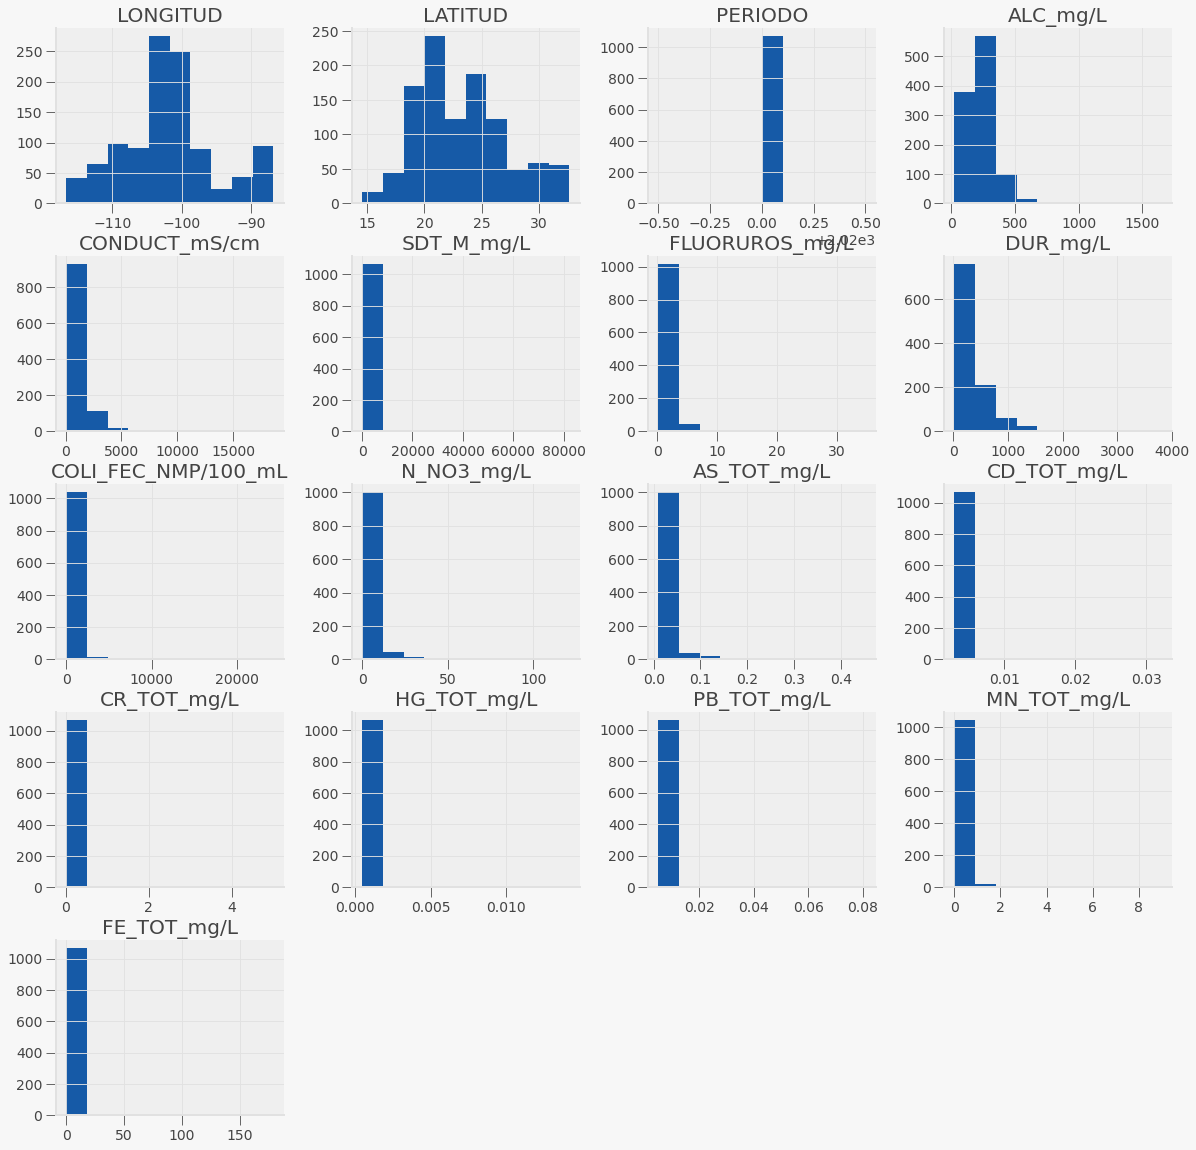

In [49]:
#Graficamos nuestras variables numericas para ver su distribución
numericas.hist(figsize=(20,20))
#plt.grid()

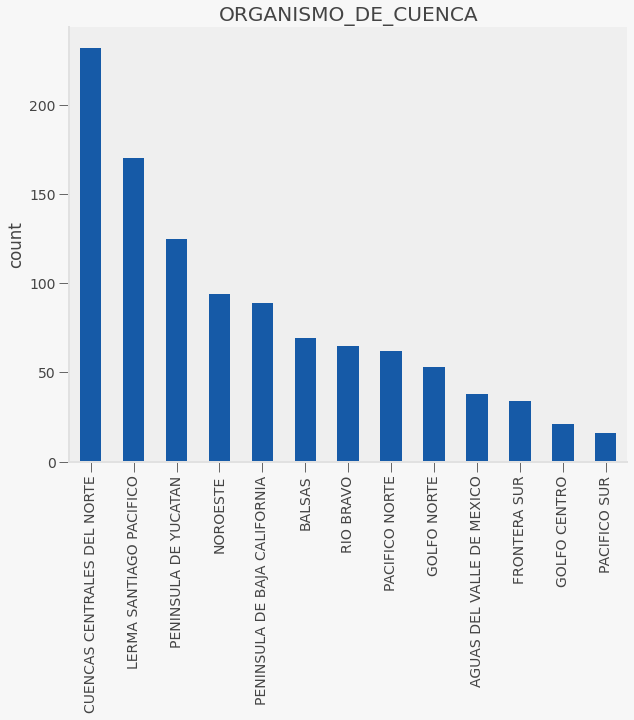

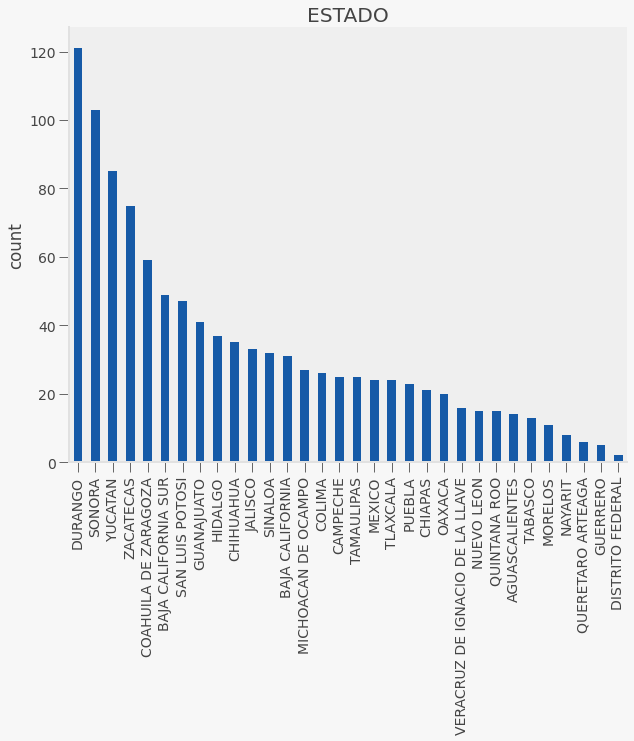

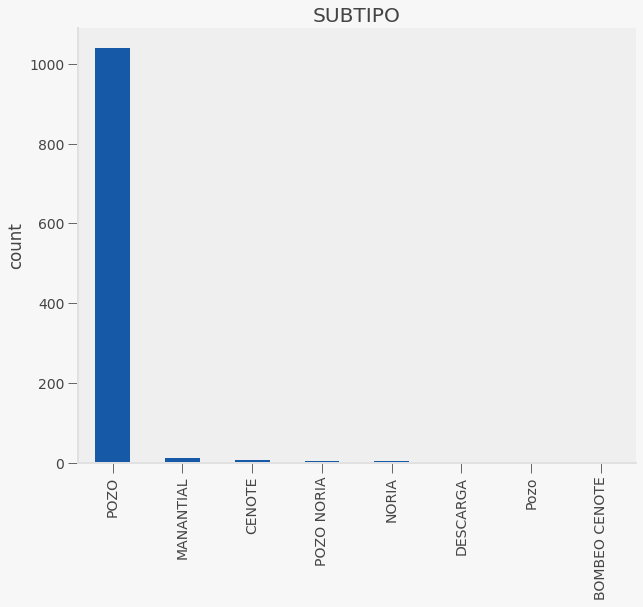

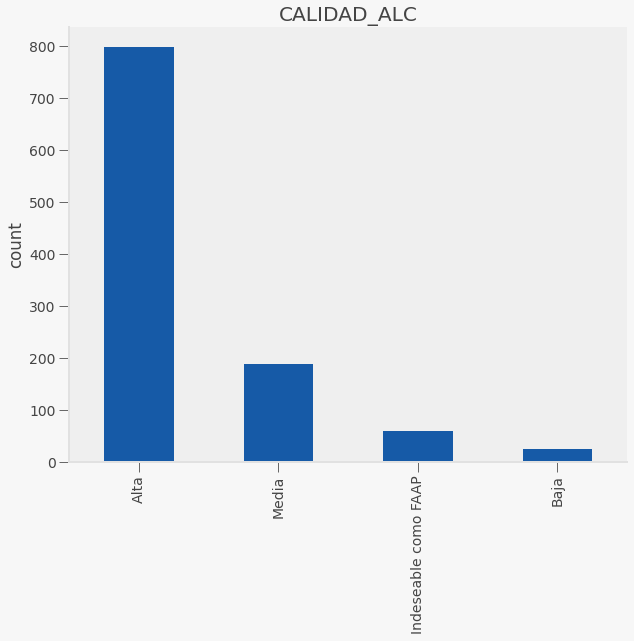

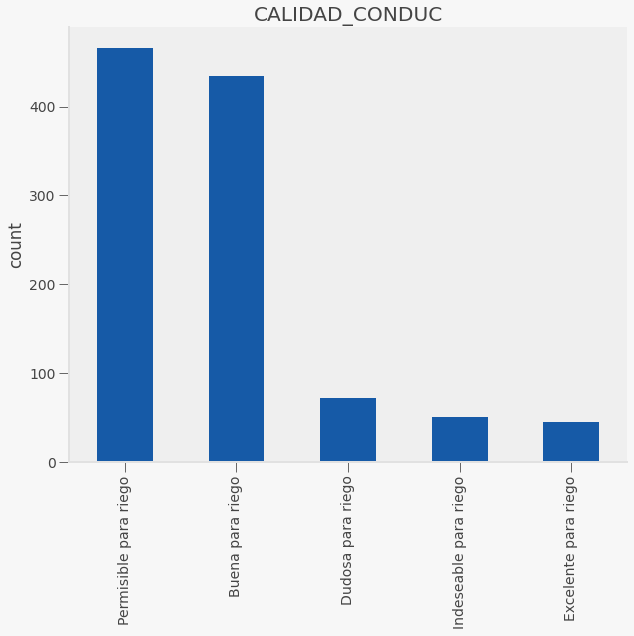

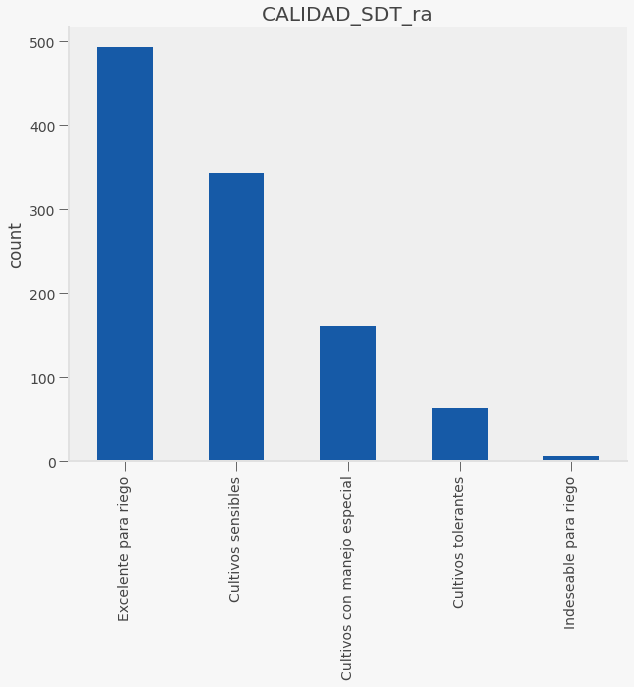

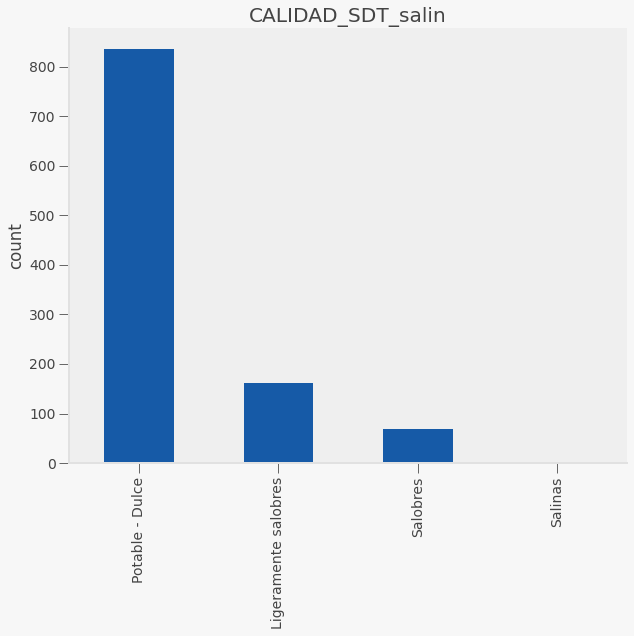

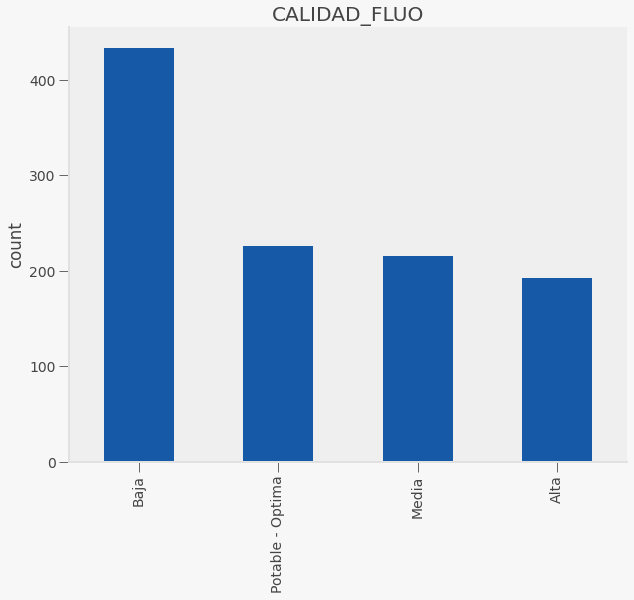

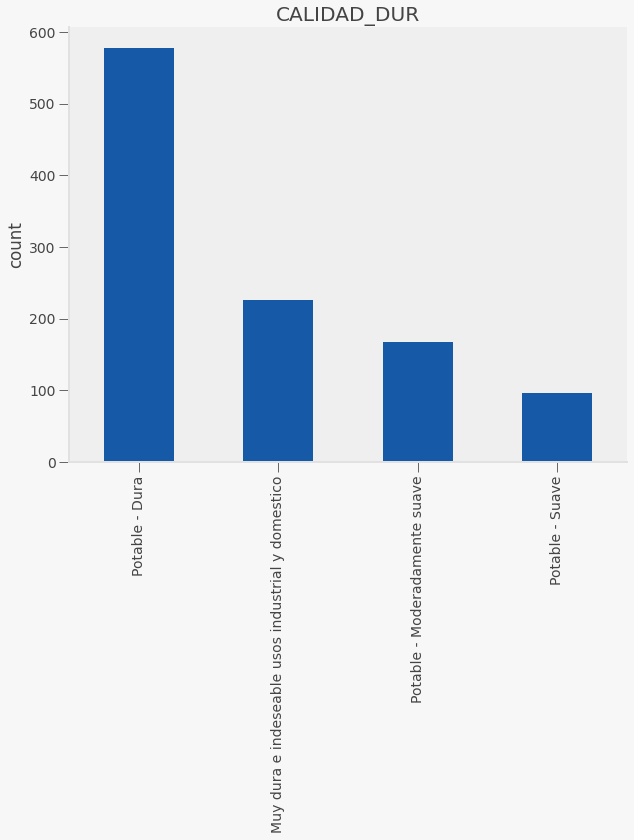

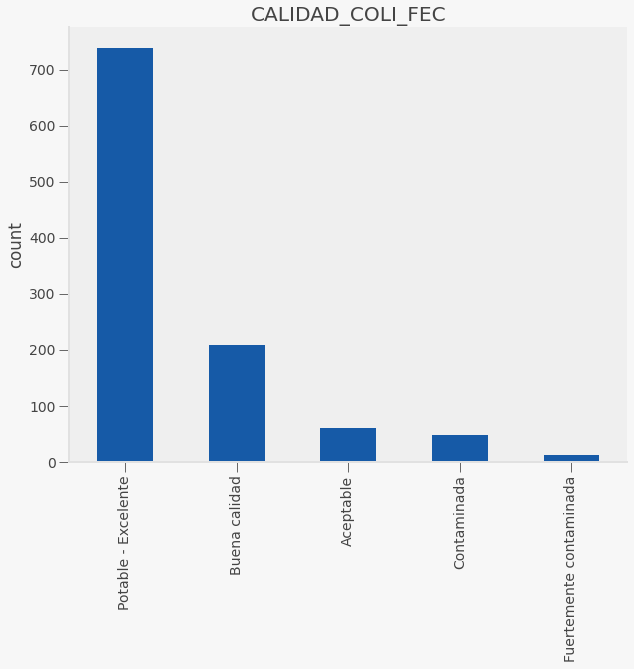

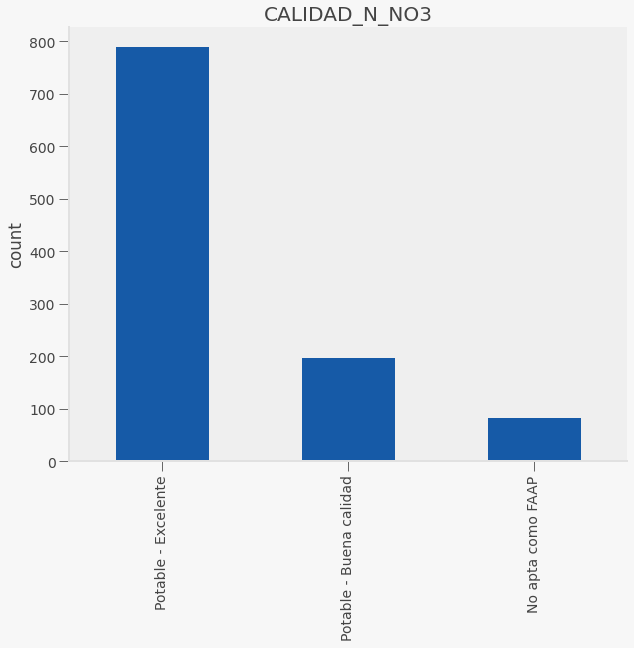

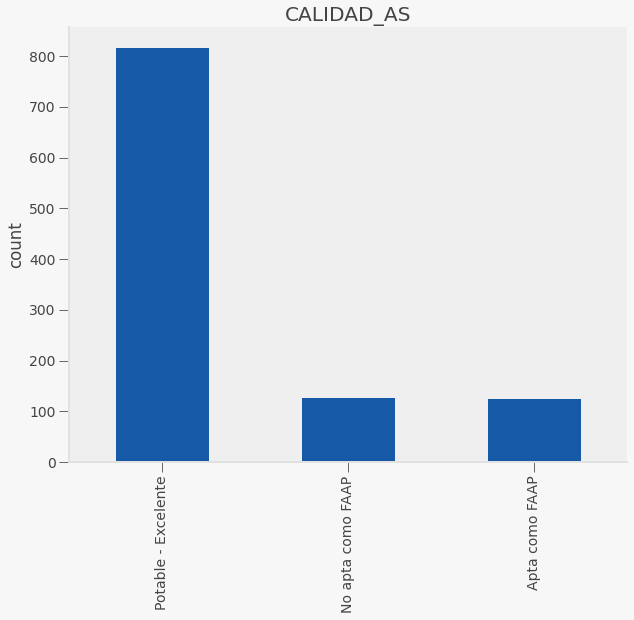

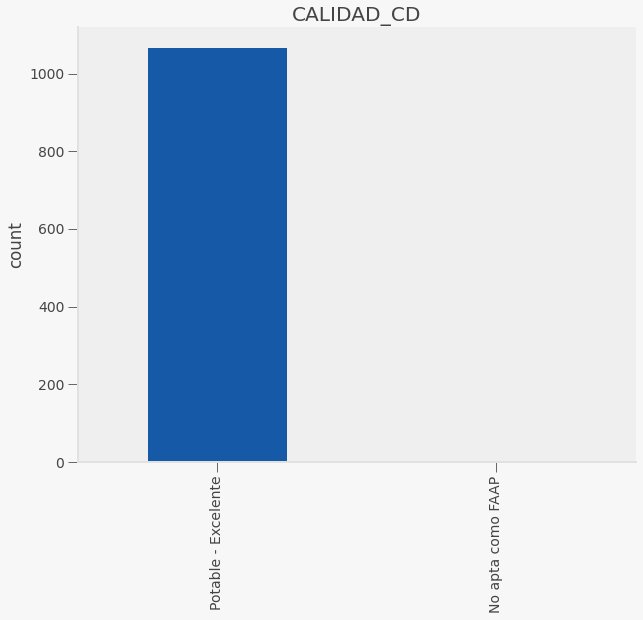

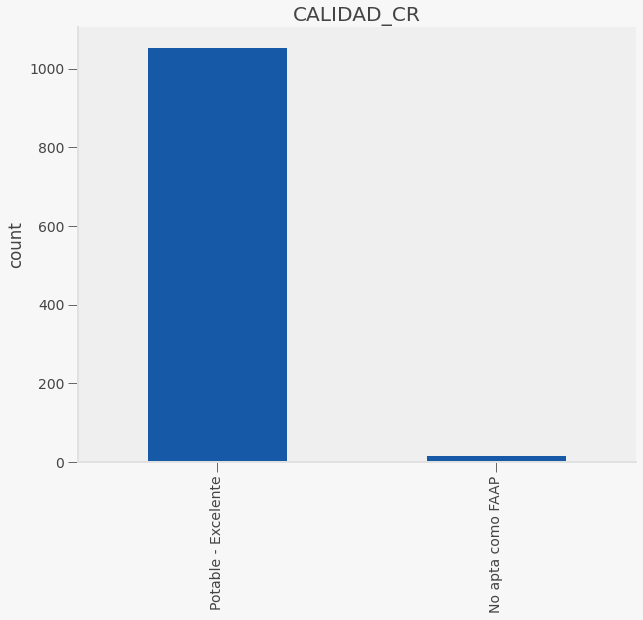

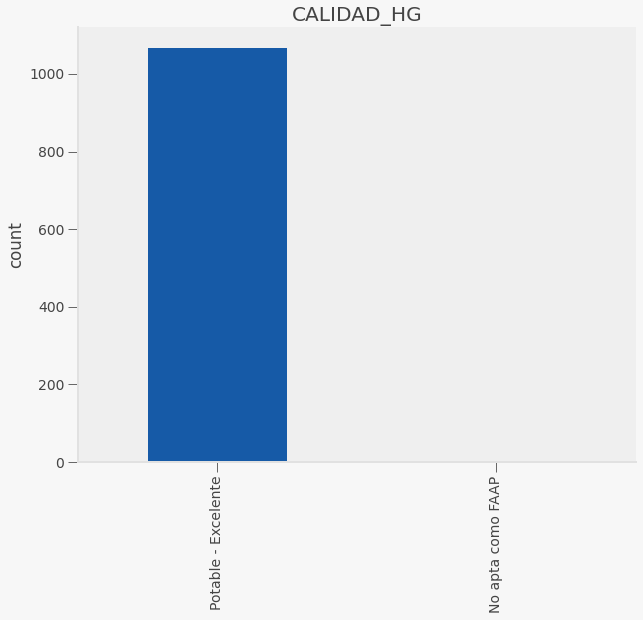

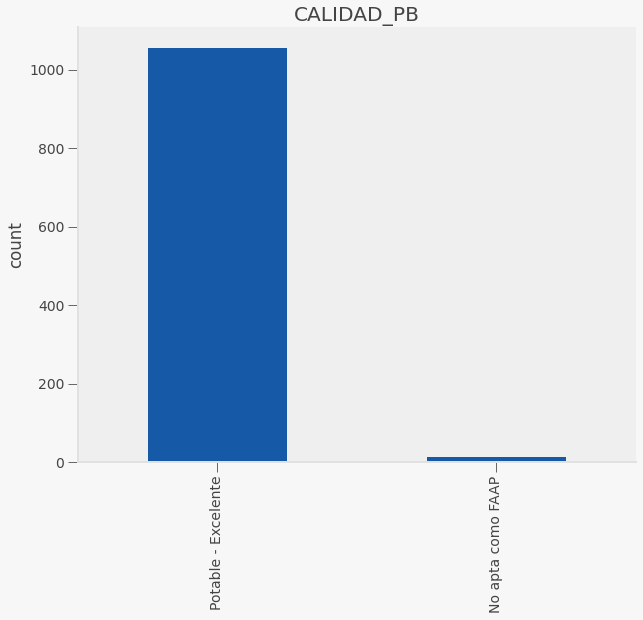

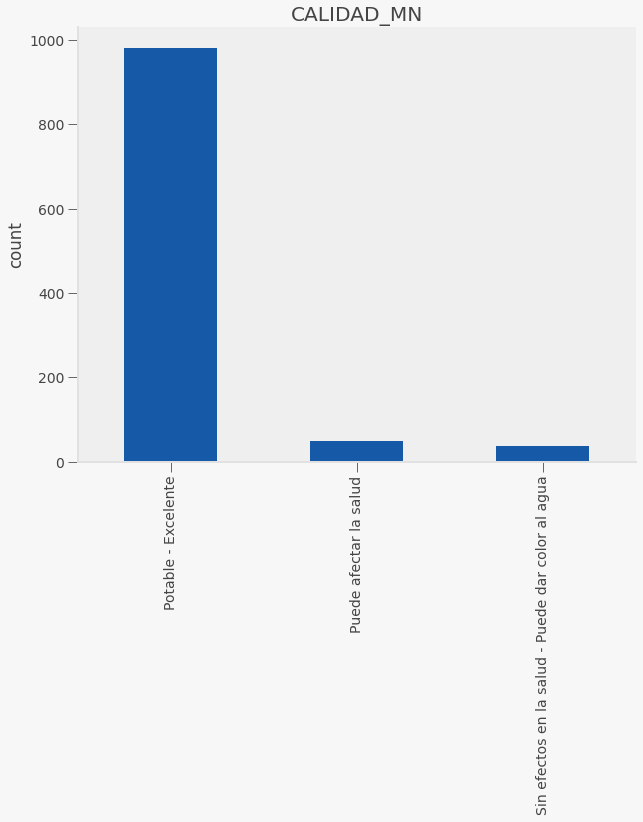

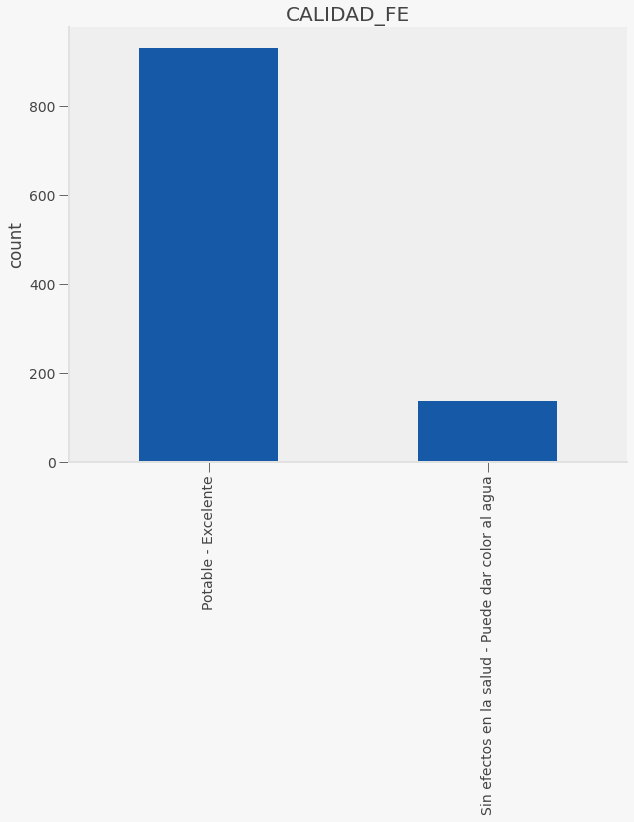

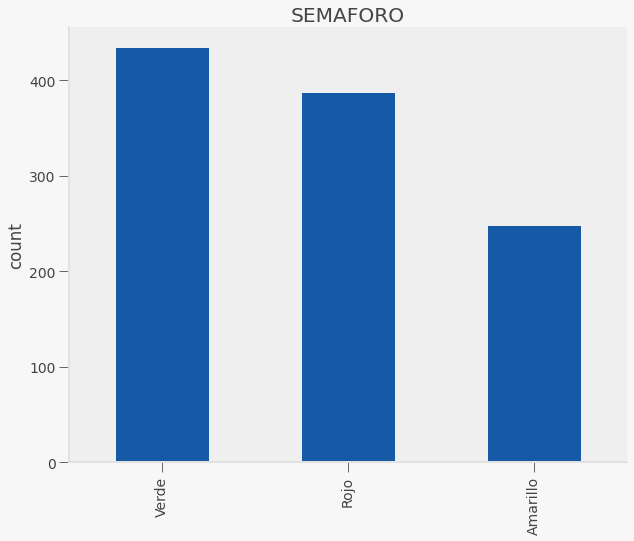

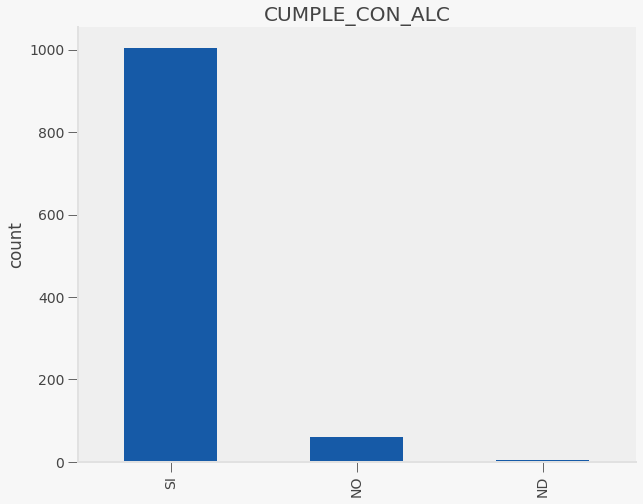

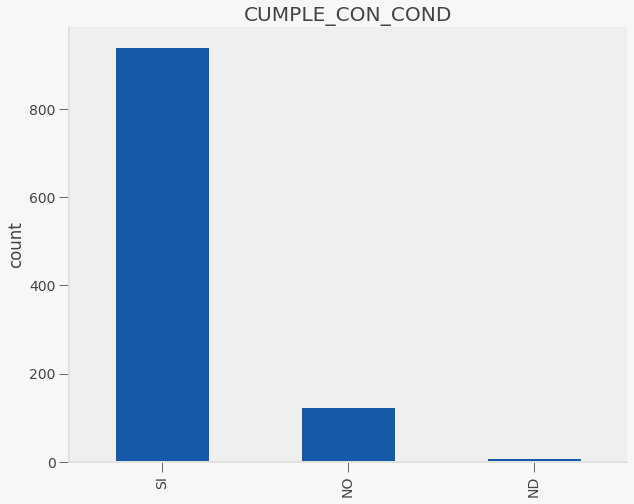

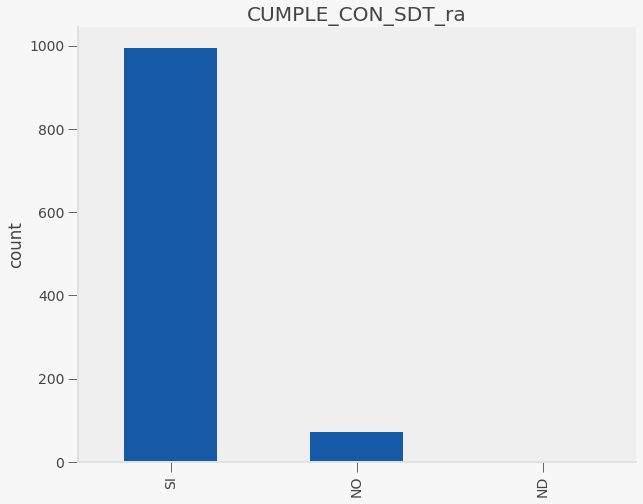

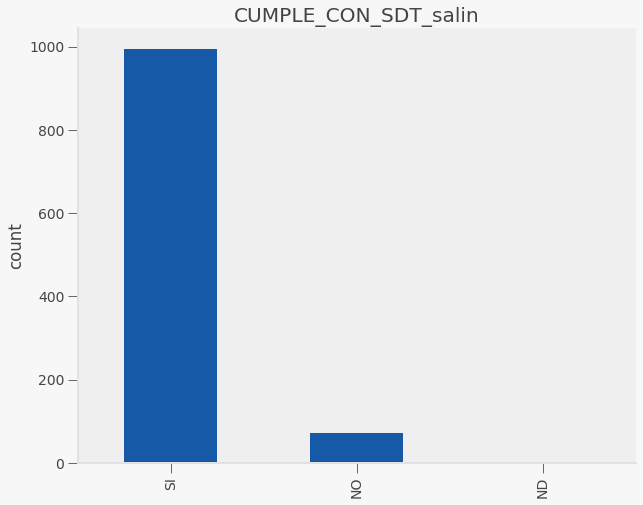

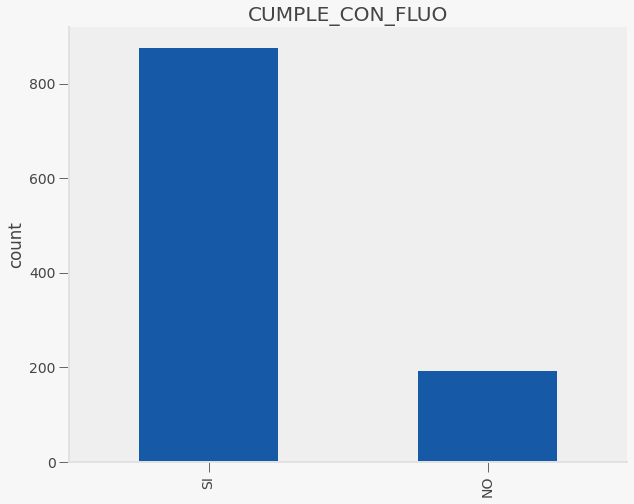

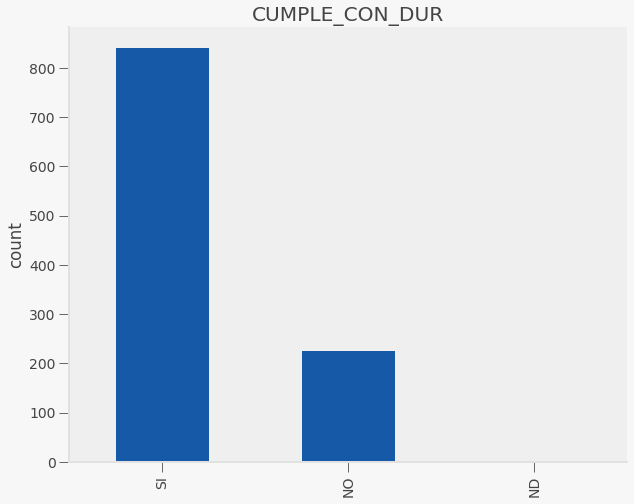

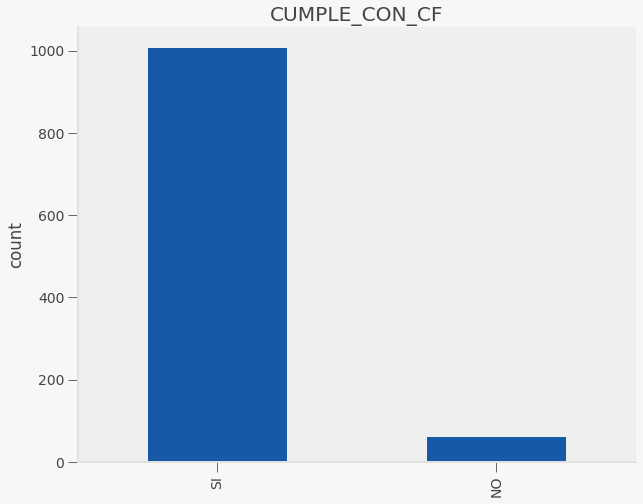

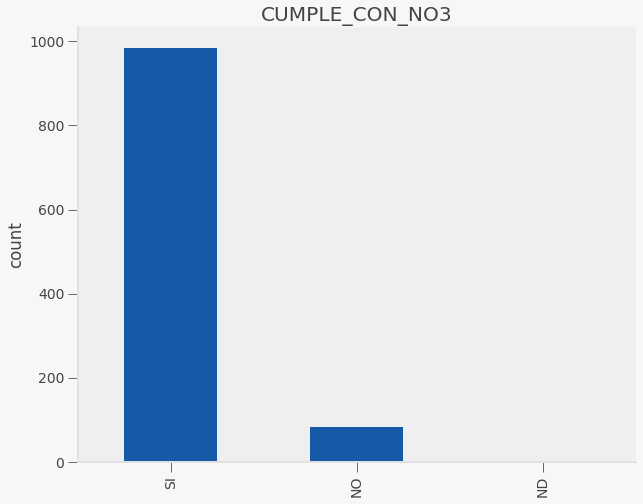

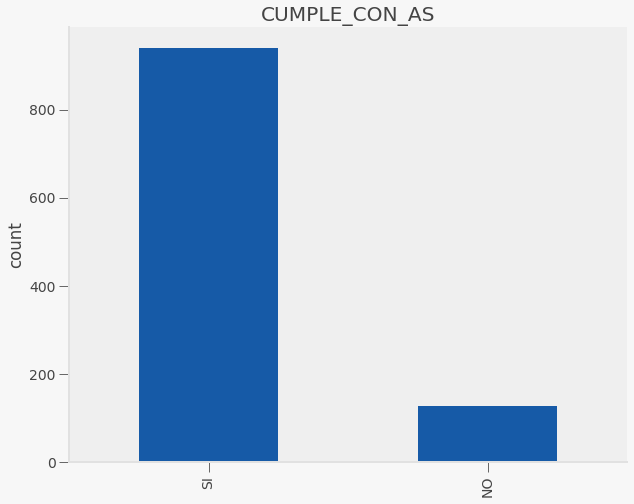

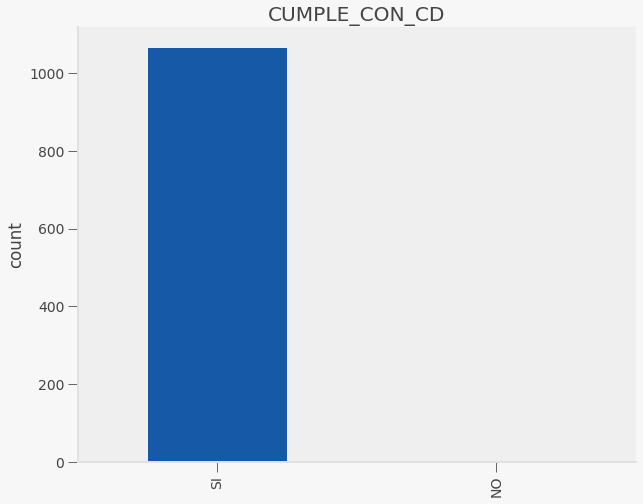

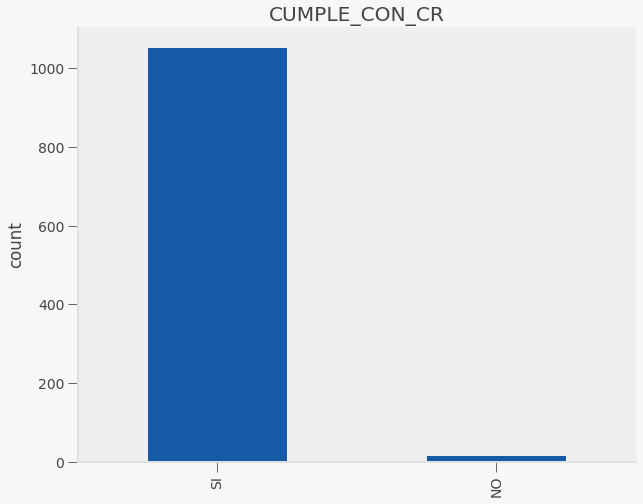

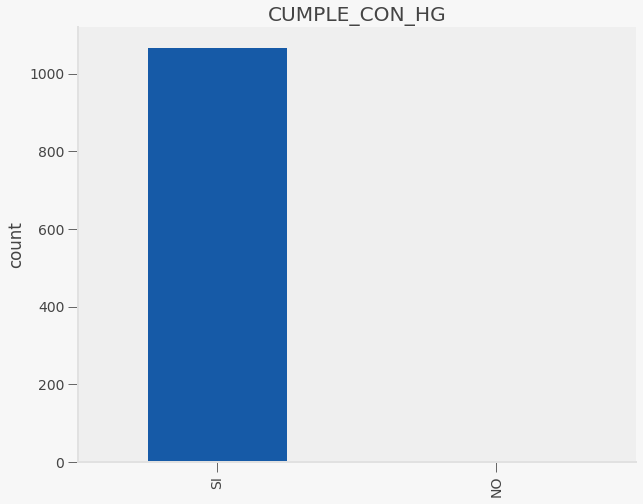

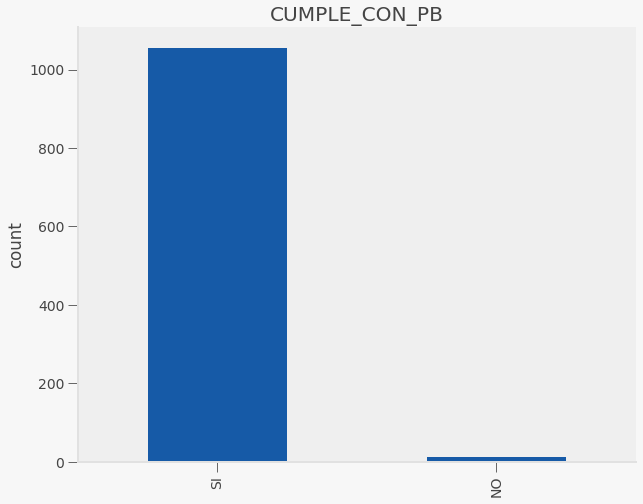

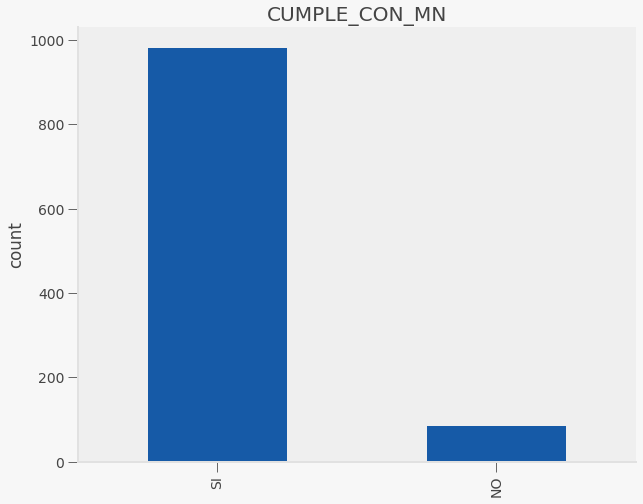

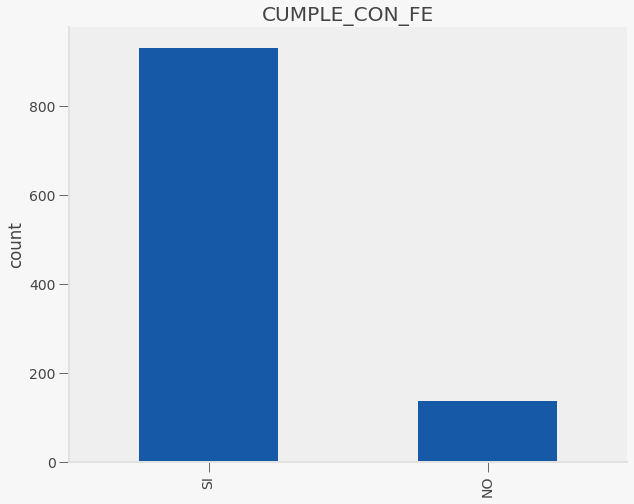

In [50]:
#Graficamos nuestras variables categoricas para ver su distribución
cat_graph = categoricas.drop(["CLAVE","SITIO","MUNICIPIO","ACUIFERO","CONTAMINANTES"],axis=1).copy()

for i in cat_graph.columns:
  categoricas[i].value_counts().plot(kind='bar', figsize=(10,8),title=str(i), ylabel="count") 
  plt.grid()
  plt.show()

In [51]:
#Para las variables que tienen muchas categorias hacemos una tabla mejor
cat_non_graph= categoricas[["CLAVE","SITIO","MUNICIPIO","ACUIFERO","CONTAMINANTES"]]
for i in cat_non_graph:
  print(i)
  print(cat_non_graph[i].value_counts())
  print("\n")

CLAVE
DLAGU6         1
OCGCE3209      1
OCFSU2993      1
OCFSU2994      1
OCFSU3048      1
              ..
DLHID6458      1
DLHID6461      1
DLHID6463      1
DLHID6467      1
OCRBR5109M1    1
Name: CLAVE, Length: 1068, dtype: int64


SITIO
EL FUERTE                           2
POZO VILLA UNION                    2
POZO BERRIOZABAL                    1
RANCHO GIUSEPPE CONSTANZO           1
QUINTA 2 POTRILLOS                  1
                                   ..
POZO SAN FRANCISCO BOJAY COLONIA    1
POZO SANTA ANA AHUEHUEPAN           1
POZO SANTA MARIA DAXTHO             1
POZO PEDRO MARIA ANAYA              1
COMUNIDAD LA REFORMA                1
Name: SITIO, Length: 1066, dtype: int64


MUNICIPIO
LA PAZ                   27
ENSENADA                 26
PARRAS                   24
HERMOSILLO               17
MERIDA                   16
                         ..
CUAUTEPEC DE HINOJOSA     1
LAS ROSAS                 1
SOCOLTENANGO              1
COMITAN DE DOMINGUEZ      1
MELCHOR O

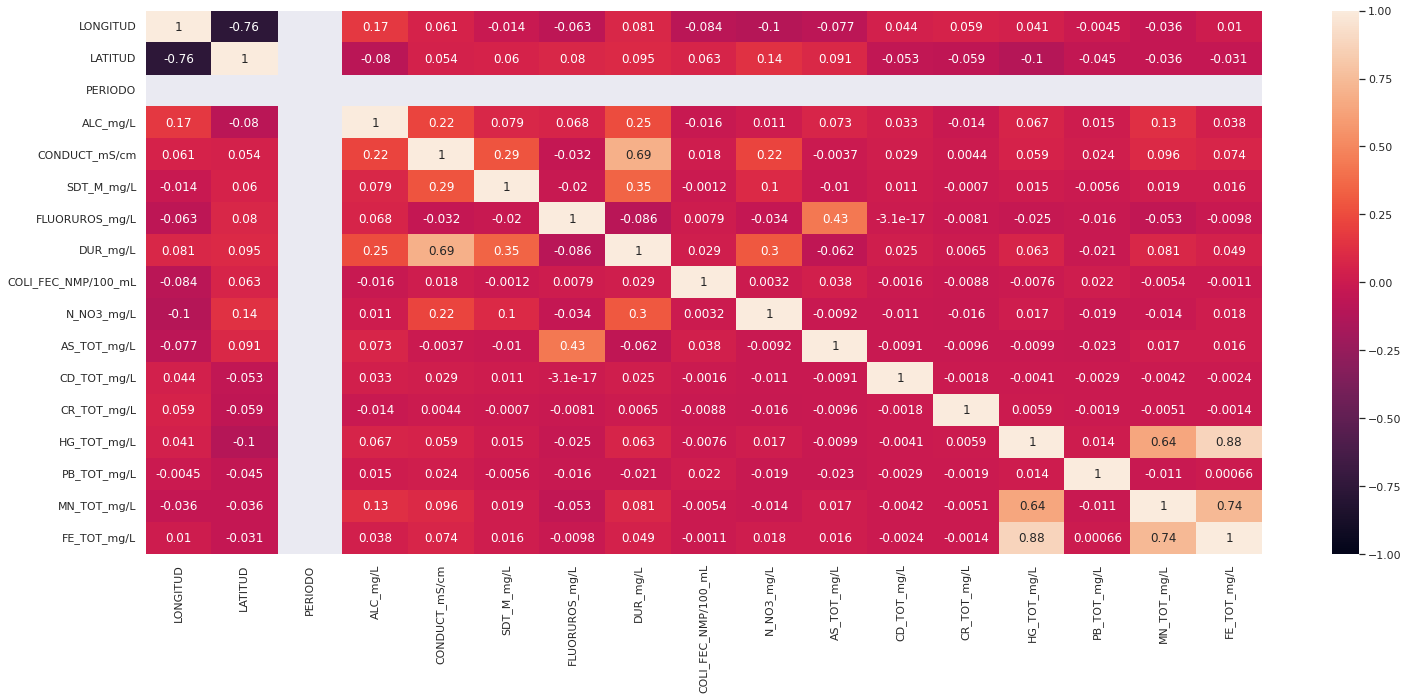

In [52]:
#Sacamos la correlación de nuestras variables
#sns.heatmap(df.corr())
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True)

In [ ]:
#Exportamos nuestro dataset que ya esta limpio
df.to_csv("Clean Data Ciencia de Datos")



---


# K-means


---



In [53]:
#Procedemos a hacer un describe para ver la distribución de nuestros datos.
#Para este K-means vamos a utilizar nuestras variables Latitud y Longitud
coordenadas.describe()

,LONGITUD,LATITUD
count,1068.000000,1068.000000
mean,-101.891007,23.163618
std,6.703263,3.887670
min,-116.664250,14.561150
25%,-105.388865,20.212055
50%,-102.174180,22.617190
75%,-98.974716,25.510285
max,-86.864120,32.677713


In [54]:
#Definimos nuestros ejes, con sus respectivas variables
x_axis=coordenadas[["LONGITUD"]]
y_axis=coordenadas[["LATITUD"]]

In [55]:
#Creamos una copia de nuestro dataframe coordenadas
coordenadas_join=coordenadas.copy()
#Verificamos que se haya hecho bien la copia
coordenadas_join.head()


,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138


In [56]:
#Hacemos un zip con coordenadas para unir la latitud y longitud
#Lo asignamos a un nuevo dataframe
coordenadas_join["COORDENADAS"] = list(zip(coordenadas_join.LONGITUD, coordenadas_join.LATITUD))
coordenadas_join.drop(columns="LONGITUD",inplace=True) 
coordenadas_join.drop(columns="LATITUD",inplace=True) 
coordenadas_join['COORDENADAS'] = coordenadas_join['COORDENADAS'].apply(Point)

In [57]:
#Hacemos un head() para comprobar que se haya hecho bien el zip
#Ahora tenemos las coordenadas unidas
coordenadas_join.head()

,COORDENADAS
0,POINT (-102.0221 22.20887)
1,POINT (-102.20075 21.99958)
2,POINT (-102.28801 22.36685)
3,POINT (-102.29449 22.18435)
4,POINT (-110.2448 23.45138)


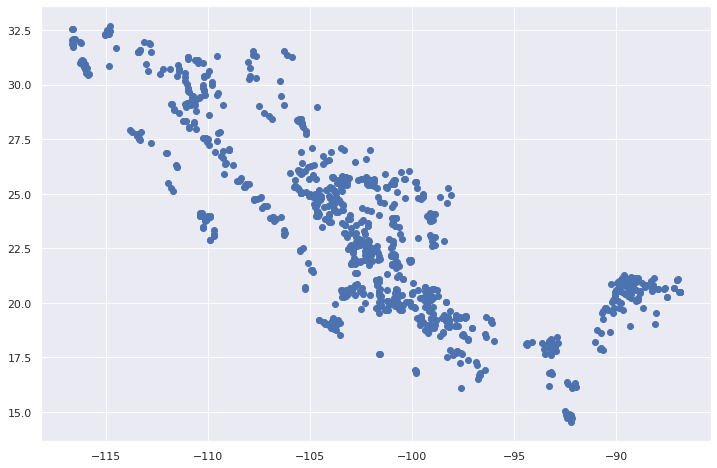

In [58]:
plt.figure(figsize=(12, 8))
plt.scatter(x_axis,y_axis)

### K-means de 2 clusteres

In [59]:
#Se obtiene el K-Means de 2 Clusters para LONGITUD y LATITUD, los ajustamos, obtenemos sus etiquetas y sus centroides
kmeans_2 = KMeans(n_clusters = 2) 
X_2 = coordenadas[['LONGITUD','LATITUD']]
kmeans_2.fit(X_2)

labels_2 = kmeans_2.labels_
print(labels_2)
centroides_2 = kmeans_2.cluster_centers_
print(centroides_2)

[1 1 1 ... 1 1 1]
[[-107.73263461   26.8309539 ]
 [ -97.82968517   20.6139462 ]]


In [60]:
#Realizamos un zip de los centroides para poder pintarlos en el mapa.
cent = pd.DataFrame(centroides_2)
cent["Coordinates"] = list(zip(cent[0], cent[1]))
cent["Coordinates"] = cent["Coordinates"].apply(Point) 
cent.head()

cent_2 = gpd.GeoDataFrame(cent, geometry="Coordinates")
cent_2

,0,1,Coordinates
0,-107.732635,26.830954,POINT (-107.73263 26.83095)
1,-97.829685,20.613946,POINT (-97.82969 20.61395)


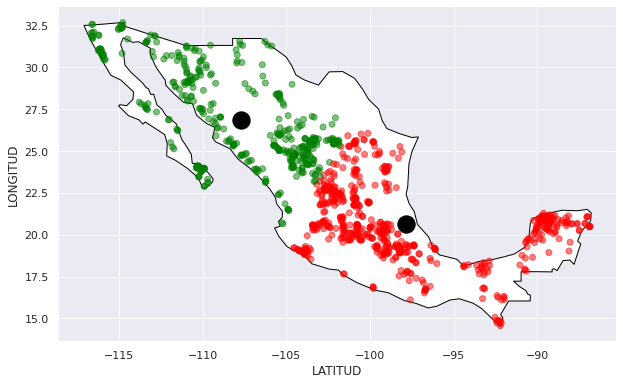

In [61]:
#Gráficamos las coordenadas del centroides obtenidos y los puntos de los datos en un mapa de MÉXICO 
coordenadas_mapa = gpd.GeoDataFrame(coordenadas_join['COORDENADAS'], geometry="COORDENADAS")

colores_2 = ['green','red']
color_asig_2 = []

for row in labels_2:
  color_asig_2.append(colores_2[row])

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
coordenadas_mapa.plot(ax=gax, color=color_asig_2, alpha = 0.5)
cent_2.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

### K-means de 3 clusteres

In [62]:
#Se obtiene el K-Means de 3 Clusters para LONGITUD y LATITUD, los ajustamos, obtenemos sus etiquetas y sus centroides
kmeans_3 = KMeans(n_clusters = 3) 
X_3 = coordenadas[['LONGITUD','LATITUD']]
kmeans_3.fit(X_3)

labels_3 = kmeans_3.labels_
print(labels_3)
centroides_3 = kmeans_3.cluster_centers_
print(centroides_3)

[0 0 0 ... 0 0 0]
[[-101.7221275    22.25422556]
 [ -90.7284703    19.47336214]
 [-110.79448776   28.43820216]]


In [63]:
#Realizamos un zip de los centroides para poder pintarlos en el mapa.
cent = pd.DataFrame(centroides_3)
cent["Coordinates"] = list(zip(cent[0], cent[1]))
cent["Coordinates"] = cent["Coordinates"].apply(Point) 
cent.head()

cent_3 = gpd.GeoDataFrame(cent, geometry="Coordinates")
cent_3

,0,1,Coordinates
0,-101.722127,22.254226,POINT (-101.72213 22.25423)
1,-90.728470,19.473362,POINT (-90.72847 19.47336)
2,-110.794488,28.438202,POINT (-110.79449 28.43820)


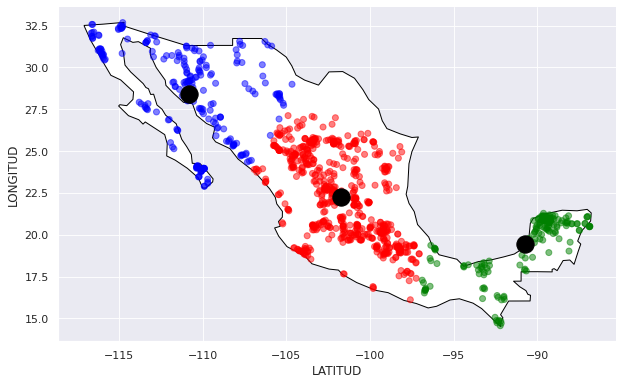

In [64]:
#Gráficamos las coordenadas del centroides obtenidos y los puntos de los datos en un mapa de MÉXICO 
coordenadas_mapa = gpd.GeoDataFrame(coordenadas_join['COORDENADAS'], geometry="COORDENADAS")

colores_3 = ['red','green', 'blue']
color_asig_3 = []

for row in labels_3:
  color_asig_3.append(colores_3[row])

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
coordenadas_mapa.plot(ax=gax, color=color_asig_3, alpha = 0.5)
cent_3.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

### K-means de 4 clusteres

In [65]:
#Se obtiene el K-Means de 4 Clusters para LONGITUD y LATITUD, los ajustamos, obtenemos sus etiquetas y sus centroides
kmeans_4 = KMeans(n_clusters = 4) 
X_4 = coordenadas[['LONGITUD','LATITUD']]
kmeans_4.fit(X_4)

labels_4 = kmeans_4.labels_
print(labels_4)
centroides_4 = kmeans_4.cluster_centers_
print(centroides_4)

[0 0 3 ... 3 3 3]
[[-100.2286467    20.26114492]
 [-111.44537124   28.7340166 ]
 [ -90.09271578   19.6502625 ]
 [-103.66584078   24.77478631]]


In [66]:
#Realizamos un zip de los centroides para poder pintarlos en el mapa.
cent = pd.DataFrame(centroides_4)
cent["Coordinates"] = list(zip(cent[0], cent[1]))
cent["Coordinates"] = cent["Coordinates"].apply(Point) 
cent.head()

cent_4 = gpd.GeoDataFrame(cent, geometry="Coordinates")
cent_4

,0,1,Coordinates
0,-100.228647,20.261145,POINT (-100.22865 20.26114)
1,-111.445371,28.734017,POINT (-111.44537 28.73402)
2,-90.092716,19.650263,POINT (-90.09272 19.65026)
3,-103.665841,24.774786,POINT (-103.66584 24.77479)


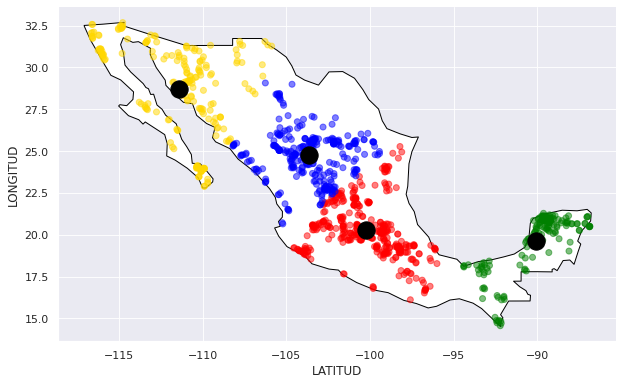

In [67]:
#Gráficamos las coordenadas del centroides obtenidos y los puntos de los datos en un mapa de MÉXICO 
coordenadas_mapa = gpd.GeoDataFrame(coordenadas_join['COORDENADAS'], geometry="COORDENADAS")

colores_4 = ['red','gold','green', 'blue']
color_asig_4 = []

for row in labels_4:
  color_asig_4.append(colores_4[row])

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
coordenadas_mapa.plot(ax=gax, color=color_asig_4, alpha = 0.5)
cent_4.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

### K-means de 5 clusteres

In [68]:
#Se obtiene el K-Means de 5 Clusters para LONGITUD y LATITUD, los ajustamos, obtenemos sus etiquetas y sus centroides
kmeans_5 = KMeans(n_clusters = 5) 
X_5 = coordenadas[['LONGITUD','LATITUD']]
kmeans_5.fit(X_5)

labels_5 = kmeans_5.labels_
print(labels_5)
centroides_5 = kmeans_5.cluster_centers_
print(centroides_5)

[2 2 2 ... 2 2 2]
[[-112.58798516   30.31649148]
 [ -90.09271578   19.6502625 ]
 [-102.57873342   24.20554738]
 [-100.12647372   19.82511781]
 [-107.79199926   25.85352689]]


In [69]:
#Realizamos un zip de los centroides para poder pintarlos en el mapa.
cent = pd.DataFrame(centroides_5)
cent["Coordinates"] = list(zip(cent[0], cent[1]))
cent["Coordinates"] = cent["Coordinates"].apply(Point) 
cent.head()

cent_5 = gpd.GeoDataFrame(cent, geometry="Coordinates")
cent_5

,0,1,Coordinates
0,-112.587985,30.316491,POINT (-112.58799 30.31649)
1,-90.092716,19.650263,POINT (-90.09272 19.65026)
2,-102.578733,24.205547,POINT (-102.57873 24.20555)
3,-100.126474,19.825118,POINT (-100.12647 19.82512)
4,-107.791999,25.853527,POINT (-107.79200 25.85353)


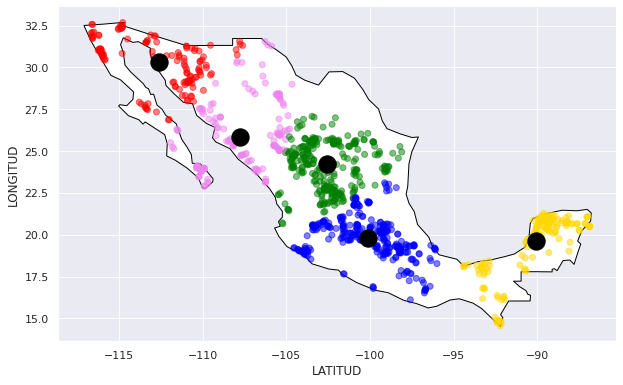

In [70]:
#Gráficamos las coordenadas del centroides obtenidos y los puntos de los datos en un mapa de MÉXICO 
coordenadas_mapa = gpd.GeoDataFrame(coordenadas_join['COORDENADAS'], geometry="COORDENADAS")

colores_5 = ['red','gold','green', 'blue','violet']
color_asig_5 = []

for row in labels_5:
  color_asig_5.append(colores_5[row])

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
coordenadas_mapa.plot(ax=gax, color=color_asig_5, alpha = 0.5)
cent_5.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)



---

# **Conclusiones**


---




### Elbow curve

Ahora sacamos la curva de codo, para ver cual es el k-means optimo.

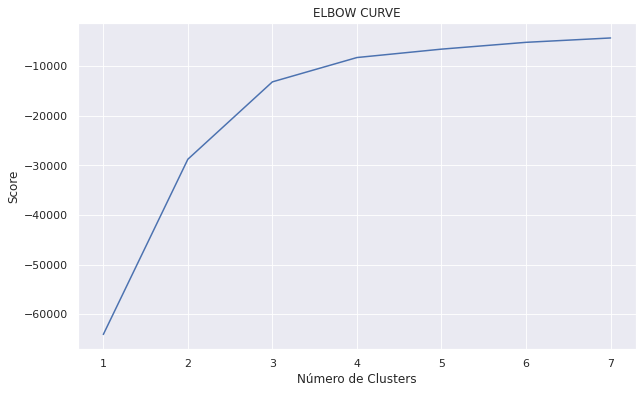

In [ ]:
num_clusters = range(1,8) 
kmeans_43 = [KMeans(n_clusters=i) for i in num_clusters]

X = coordenadas[['LONGITUD','LATITUD']]
cal_kmeans = [kmeans_43[i].fit(X).score(X) for i in range(len(kmeans_43))]

plt.figure(figsize=(10,6))
plt.plot(num_clusters, cal_kmeans)
plt.title('ELBOW CURVE')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')

plt.show()


Con base en la curva de codo resultando entre 1 y 8 Clusters podemos observar que el mayor quiebre se encuentra a partir del tercer cluster y de ahí su curva comienza a decaer. Es evidente que la diferencia entre 3 y 5 no es significante porque lo que nos daría un resultado no óptimo.



---



---



# **Ciencia y Analítica de datos**
## **RETO FINAL PARTE 2**
### **Clasificación-ensambles**


---

## **Profesora:** María de la Paz Rico Fernández

## **Equipo 43:** 
* Carlos Daniel Mendoza Paz - A01793027
* Alan Avelino Fernández Juárez - A00989308



---
Noviembre 18, 2022



# Clasificación

Seleccionamos las variables que serán de entrada, las de mayor importancia, de todas las categoricas que tenemos

In [71]:
#Hacemos un head al dataframe que trae las variables categoricas
categoricas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,Alta,Permisible para riego,Cultivos sensibles,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,Alta,Buena para riego,Excelente para riego,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,Alta,Buena para riego,Excelente para riego,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,Alta,Buena para riego,Excelente para riego,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,Alta,Permisible para riego,Cultivos con manejo especial,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [72]:
#Creamos una lista con las variables mas importantes que vamos a seleccionar para este análisis
list_cat_important = ['SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR',
       'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD',
       'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE',]

cat_important = categoricas[list_cat_important].copy()

In [73]:
#Hacemos un info para ver como quedaron nuestras variables categoricas mas importantes
#de igual forma para ver que no vayamos a tener algún valor nulo por ahí
cat_important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SUBTIPO            1068 non-null   object
 1   CALIDAD_ALC        1068 non-null   object
 2   CALIDAD_CONDUC     1068 non-null   object
 3   CALIDAD_SDT_ra     1068 non-null   object
 4   CALIDAD_SDT_salin  1068 non-null   object
 5   CALIDAD_FLUO       1068 non-null   object
 6   CALIDAD_DUR        1068 non-null   object
 7   CALIDAD_COLI_FEC   1068 non-null   object
 8   CALIDAD_N_NO3      1068 non-null   object
 9   CALIDAD_AS         1068 non-null   object
 10  CALIDAD_CD         1068 non-null   object
 11  CALIDAD_CR         1068 non-null   object
 12  CALIDAD_HG         1068 non-null   object
 13  CALIDAD_PB         1068 non-null   object
 14  CALIDAD_MN         1068 non-null   object
 15  CALIDAD_FE         1068 non-null   object
dtypes: object(16)
memory usage: 133.6+ KB


## Label Encoder

Necesitamos aplicar un Label Encoder para nuestra variable de salida "SEMAFORO" ya que al ser esta categorica, tenemos que transformarla a valores numéricos y así poder procesarla.

In [74]:
#Definimos nuestra variable dependiente e independiente
cat_x_data= cat_important.copy()
cat_y_data= categoricas[["SEMAFORO"]].copy()

In [75]:
#Vemos que valores (categorias) trae nuestra variable "y" ya que esta es una variable categorica
#Por ende debemos de transformar a números cada una de esas categorias (codificarlo)
#Para ello vamos a usar la función de Label Encoder de sklearn
cat_y_data.SEMAFORO.unique()

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

Aplicamos el Label Encoder a nuestra variable categórica de salida "y"

In [76]:
#Importamos la librería de sklearn
from sklearn.preprocessing import LabelEncoder

#Hacemos una instancia de la función LabelEncoder()
encoder = LabelEncoder()

#Codificamos nuestra variable categorica
cat_y_data["SEMAFORO"] = encoder.fit_transform(cat_y_data["SEMAFORO"])
cat_y_data.head()

,SEMAFORO
0,2
1,2
2,1
3,2
4,1


In [77]:
#Codificamos nuestras variables categoricas de entrada 
cat_x_data["SUBTIPO"] = encoder.fit_transform(cat_x_data["SUBTIPO"])
cat_x_data["CALIDAD_ALC"] = encoder.fit_transform(cat_x_data["CALIDAD_ALC"])
cat_x_data["CALIDAD_CONDUC"] = encoder.fit_transform(cat_x_data["CALIDAD_CONDUC"])
cat_x_data["CALIDAD_SDT_ra"] = encoder.fit_transform(cat_x_data["CALIDAD_SDT_ra"])
cat_x_data["CALIDAD_SDT_salin"] = encoder.fit_transform(cat_x_data["CALIDAD_SDT_salin"])
cat_x_data["CALIDAD_FLUO"] = encoder.fit_transform(cat_x_data["CALIDAD_FLUO"])
cat_x_data["CALIDAD_DUR"] = encoder.fit_transform(cat_x_data["CALIDAD_DUR"])
cat_x_data["CALIDAD_COLI_FEC"] = encoder.fit_transform(cat_x_data["CALIDAD_COLI_FEC"])
cat_x_data["CALIDAD_N_NO3"] = encoder.fit_transform(cat_x_data["CALIDAD_N_NO3"])
cat_x_data["CALIDAD_AS"] = encoder.fit_transform(cat_x_data["CALIDAD_AS"])
cat_x_data["CALIDAD_CD"] = encoder.fit_transform(cat_x_data["CALIDAD_CD"])
cat_x_data["CALIDAD_CR"] = encoder.fit_transform(cat_x_data["CALIDAD_CR"])
cat_x_data["CALIDAD_HG"] = encoder.fit_transform(cat_x_data["CALIDAD_HG"])
cat_x_data["CALIDAD_PB"] = encoder.fit_transform(cat_x_data["CALIDAD_PB"])
cat_x_data["CALIDAD_MN"] = encoder.fit_transform(cat_x_data["CALIDAD_MN"])
cat_x_data["CALIDAD_FE"] = encoder.fit_transform(cat_x_data["CALIDAD_FE"])


In [78]:
#Comprobamos que ya esten codificadas nuestras variables
cat_x_data.head()

,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
0,5,0,4,1,1,3,1,4,2,0,1,1,1,1,0,0
1,5,0,0,3,1,3,1,4,1,0,1,1,1,1,0,0
2,5,0,0,3,1,0,1,4,2,1,1,1,1,1,0,0
3,5,0,0,3,1,3,1,4,2,0,1,1,1,1,0,0
4,5,0,4,0,0,1,1,0,0,2,1,1,1,1,0,0


In [79]:
#Volvemos hacer un unique para visualizar de mejor manera como quedaron nuestros datos
#Como podemos ver, anteriormente teniámos tres categorías 'Verde', 'Rojo', 'Amarillo'
#Ahora esas categorias fueron convertidas a las siguientes categorías [2, 1, 0]
cat_y_data.SEMAFORO.unique()

array([2, 1, 0])

In [80]:
#Asignamos esos valores numéricos a nuestra variable de salida "Y" y de entrada "x"
x_data = cat_x_data
y_data=cat_y_data["SEMAFORO"]

print("X:",x_data.shape)
print("Y:",y_data.shape)


X: (1068, 16)
Y: (1068,)


In [81]:
#Ahora si validamos que nuestra variable dependiente e independiente sean numéricas
print("Tipo de Variables")
print("------ X --------")
print(x_data.dtypes)
print("------ Y --------")
print("SEMAFORO",y_data.dtypes)

Tipo de Variables
------ X --------
SUBTIPO              int64
CALIDAD_ALC          int64
CALIDAD_CONDUC       int64
CALIDAD_SDT_ra       int64
CALIDAD_SDT_salin    int64
CALIDAD_FLUO         int64
CALIDAD_DUR          int64
CALIDAD_COLI_FEC     int64
CALIDAD_N_NO3        int64
CALIDAD_AS           int64
CALIDAD_CD           int64
CALIDAD_CR           int64
CALIDAD_HG           int64
CALIDAD_PB           int64
CALIDAD_MN           int64
CALIDAD_FE           int64
dtype: object
------ Y --------
SEMAFORO int64


In [82]:
#Hacemos un shape
print("X:",x_data.shape)
print("Y:",y_data.shape)

X: (1068, 16)
Y: (1068,)


# Decition tree | Random Forest

In [91]:
#Importamos nuestras librerías
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from IPython.display import Image

In [84]:
#Creamos nuestro set de entrenamiento y prueba siguiendo la regla del 80-20, 80% Train y 20% Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20) 

In [85]:
#Validamos que la partición de los datos se haya hecho de forma correcta
print("----- PARTICION DE ENTRENAMIENTO -----")
print("X: ",x_train.shape)
print("Y: ",y_train.shape)

print("------- PARTICION DE VALIDACIÖN ------")
print("X: ",x_test.shape)
print("Y: ",y_test.shape)

----- PARTICION DE ENTRENAMIENTO -----
X:  (854, 16)
Y:  (854,)
------- PARTICION DE VALIDACIÖN ------
X:  (214, 16)
Y:  (214,)


In [86]:
#Imputaciones
cat_pipe = Pipeline(steps= [('impt_cat', SimpleImputer(strategy= 'most_frequent', missing_values= np.nan))])
col_cat = ['SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
          'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']

transform_columns = ColumnTransformer(transformers=[('var_cat', cat_pipe, col_cat)])

# Arbol de desición

In [87]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
max_depth = np.linspace(1,20,20, dtype="int")
pipeline = Pipeline(steps=[('ct',transform_columns),('m',DecisionTreeClassifier())])
lst_min_samples_split = [i for i in range(2, 11)]
param_grid = {
    'm__ccp_alpha': np.linspace(0.0001,1,5),
    'm__criterion':['gini', 'entropy', 'log_loss'],
    'm__max_depth': max_depth,
    'm__min_samples_split': lst_min_samples_split,
    'm__class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring='accuracy',
                    n_jobs=-1
                    )

grid.fit(x_train, y_train)

print('Mejor valor del accuracy:', grid.best_score_)
print('Mejores valores de los hiperparametros:', grid.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27000 fits failed out of a total of 81000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-pa

Mejor valor del accuracy: 0.9711111111111109
Mejores valores de los hiperparametros: {'m__ccp_alpha': 0.0001, 'm__class_weight': 'balanced', 'm__criterion': 'gini', 'm__max_depth': 14, 'm__min_samples_split': 2}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.55134962 0.55134962 0.55134962 ...        nan        nan        nan]
  category=UserWarning,


Ahora generamos el modelo con los mejores hiperparámetros obtenidos anteriormente

In [88]:
#Alpha: 0.0001
#Class_weight':'balanced'
#Criterion:'gini'
#Depth': 17
#Samples_split: 2
dt_model = DecisionTreeClassifier(ccp_alpha=0.0001,class_weight="balanced",criterion='gini',max_depth=17,min_samples_split=2)
dt_pipe = Pipeline(steps=[('ct',transform_columns), ('m',dt_model)])
dt_model = dt_pipe.fit(x_train,y_train)

dt_y_pred = dt_model.predict(x_test)

Ahora hacemos el reporte de clasificación

In [89]:
#Importamos las librerías
from sklearn.metrics import classification_report

print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.99      0.96      0.97        79
           2       0.98      0.98      0.98        87

    accuracy                           0.97       214
   macro avg       0.96      0.97      0.96       214
weighted avg       0.97      0.97      0.97       214



Obtenemos la matriz de confusión

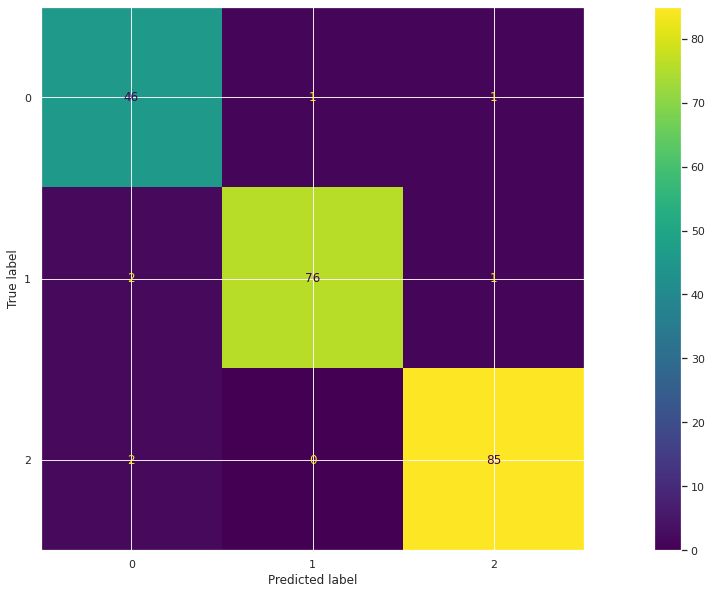

In [90]:
#Importamos la librería para obtener la matriz de confusión
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

dt_mc=confusion_matrix(y_test,dt_y_pred)

mc_plot=ConfusionMatrixDisplay(dt_mc)
mc_plot.plot()


---


# **FIN DEL RETO**


---

